In [1]:
import os
import os.path as osp
import numpy as np
import wandb
from pathlib import Path

from PIL import Image, ImageDraw
import json

In [2]:
DEEP_FASHION_DIR = osp.join(osp.expanduser('~'), 'Documents', 'dev', 'DeepFashion')
DEEP_FASHION_CLOTHING_ANNOS_DIR = osp.join(DEEP_FASHION_DIR, 'Anno_coarse')
DEEP_FASHION_CLOTHING_IMAGES_DIR = osp.join(DEEP_FASHION_DIR, 'img')
DEEP_FASHION_CLOTHING_CATEGORIES_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_category_cloth.txt')
DEEP_FASHION_CLOTHING_ATTRIBUTES_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_attr_cloth.txt')
DEEP_FASHION_CLOTHING_LIST_CAT_IMG_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_category_img.txt')
DEEP_FASHION_CLOTHING_LIST_ATT_IMG_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_attr_img.txt')

CLASS_LABELS = []
with open(DEEP_FASHION_CLOTHING_LIST_CAT_IMG_PATH, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            CLASS_LABELS.append((int(line.split()[1]) -1))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
labels = np.array(CLASS_LABELS)

In [5]:
labels_hist = np.histogram(labels)

In [9]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47])

(array([1.6000e+02, 7.4950e+03, 2.4557e+04, 3.0900e+02, 3.3000e+02,
        1.3311e+04, 3.2400e+02, 1.7000e+01, 7.1600e+02, 4.0480e+03,
        1.0467e+04, 7.4800e+02, 6.7600e+02, 9.7000e+01, 7.9100e+02,
        1.3123e+04, 0.0000e+00, 1.5429e+04, 3.6887e+04, 1.0078e+04,
        1.4600e+02, 7.7000e+01, 5.2700e+02, 4.8600e+02, 1.6690e+03,
        4.9000e+01, 7.0760e+03, 5.9400e+02, 4.5000e+01, 4.4160e+03,
        5.0130e+03, 3.2000e+01, 1.9666e+04, 0.0000e+00, 1.4773e+04,
        3.0480e+03, 1.1060e+03, 3.8600e+02, 5.4000e+01, 0.0000e+00,
        2.1200e+03, 1.7000e+01, 7.2158e+04, 6.1530e+03, 1.2600e+02,
        2.2940e+03, 0.0000e+00, 7.0000e+01, 1.5000e+02, 7.4080e+03]),
 array([ 0.  ,  0.94,  1.88,  2.82,  3.76,  4.7 ,  5.64,  6.58,  7.52,
         8.46,  9.4 , 10.34, 11.28, 12.22, 13.16, 14.1 , 15.04, 15.98,
        16.92, 17.86, 18.8 , 19.74, 20.68, 21.62, 22.56, 23.5 , 24.44,
        25.38, 26.32, 27.26, 28.2 , 29.14, 30.08, 31.02, 31.96, 32.9 ,
        33.84, 34.78, 35.72, 36.66

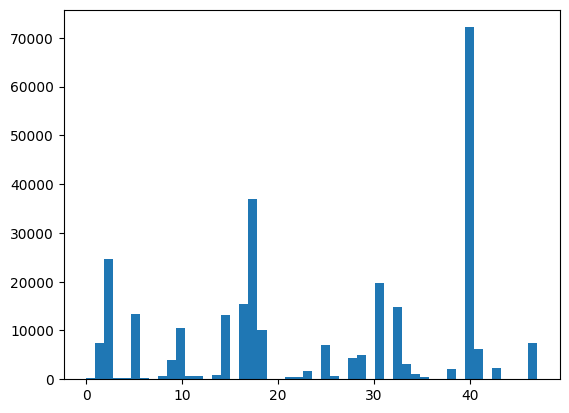

In [10]:
plt.hist(labels, bins=50)

In [ ]:
WANDB_PROJECT = 'fashion-retrieval'
ENTITY = None

DEEP_FASHION_DIR = osp.join(osp.expanduser('~'), 'Documents', 'dev', 'DeepFashion')
DEEP_FASHION_CLOTHING_ANNOS_DIR = osp.join(DEEP_FASHION_DIR, 'Anno_coarse')
DEEP_FASHION_CLOTHING_IMAGES_DIR = osp.join(DEEP_FASHION_DIR, 'img')
DEEP_FASHION_CLOTHING_CATEGORIES_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_category_cloth.txt')
DEEP_FASHION_CLOTHING_ATTRIBUTES_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_attr_cloth.txt')
DEEP_FASHION_CLOTHING_LIST_CAT_IMG_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_category_img.txt')
DEEP_FASHION_CLOTHING_LIST_ATT_IMG_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_attr_img.txt')

CLASS_LABELS = []
ATTR_LABELS = []

# 1. In category type, "1" represents upper-body clothes, "2" represents lower-body clothes, "3" represents full-body clothes;
# 2. The order of category labels accords with the order of category names;
# 3. In category labels, the number represents the category id in category names;
# 4. For the clothing categories, "Cape", "Nightdress", "Shirtdress" and "Sundress" have been merged into "Dress";
# 5. Category prediction is treated as a 1-of-K classification problem.

CATEGORY_TYPES = {
    1: 'upper-body',
    2: 'lower-body',
    3: 'full-body'
}

# 1. In attribute type, "1" represents texture-related attributes, "2" represents fabric-related attributes, "3" represents shape-related attributes, "4" represents part-related attributes, "5" represents style-related attributes;
# 2. The order of attribute labels accords with the order of attribute names;
# 3. In attribute labels, "1" represents positive while "-1" represents negative, '0' represents unknown;
# 4. Attribute prediction is treated as a multi-label tagging problem.

ATTRIBUTE_TYPES = {
    1: 'texture',
    2: 'fabric',
    3: 'shape',
    4: 'part',
    5: 'style'
}

with open(DEEP_FASHION_CLOTHING_CATEGORIES_PATH, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            CLASS_LABELS.append(line.split()[0])
            
with open(DEEP_FASHION_CLOTHING_ATTRIBUTES_PATH, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            ATTR_LABELS.append(' '.join(l for l in line.split() if l.replace('-', '').isalpha()))
            
IDX_TO_CLASS = {idx + 1:c for idx, c in enumerate(CLASS_LABELS)}
CLS_TO_IDX = {v: k for k, v in IDX_TO_CLASS.items()}

DATA_DICT = dict()

with open(DEEP_FASHION_CLOTHING_LIST_CAT_IMG_PATH, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            DATA_DICT[idx-2] = {
                "path": line.split()[0],
                "cat_index": int(line.split()[1]),
                "category": IDX_TO_CLASS[int(line.split()[1])]
            }

with open(DEEP_FASHION_CLOTHING_LIST_ATT_IMG_PATH, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            DATA_DICT[idx-2]['attributes'] = [idx for idx, att in enumerate(line.split()[1:]) if int(att) > 0]  
            
            
            

In [ ]:
IDX_TO_ATTR = {idx: val for idx, val in enumerate(ATTR_LABELS)}

In [ ]:
# Initiate a wandb run
run = wandb.init(project=WANDB_PROJECT, entity=ENTITY, job_type='upload')

In [ ]:
artifact = wandb.Artifact(name='deep-fashion', type='raw-data')

In [ ]:
DEEP_FASHION_DIR

In [ ]:
artifact.add_file(osp.join(DEEP_FASHION_DIR, 'README.txt'))
# artifact.add_dir(DEEP_FASHION_CLOTHING_IMAGES_DIR, name='Images')
# artifact.add_dir(DEEP_FASHION_CLOTHING_ANNOS_DIR, name='Annotations')

In [ ]:
run.log_artifact(artifact)

In [ ]:
run.finish()

In [ ]:
run = wandb.init(project=WANDB_PROJECT, entity=ENTITY, job_type='upload')
artifact = run.use_artifact('deep-fashion:latest',
                            type='raw-data')
artifact_dir = artifact.download()

In [ ]:
import random
idx = random.sample(range(0, len(DATA_DICT.keys())), 10000)

In [ ]:
table = wandb.Table(columns=['Image Name', 'Image', 'Category', 'Attributes'])

In [ ]:
for _i in idx:
    data = DATA_DICT.get(_i)
    _name = data['path'].split('/')[1]
    _img = Image.open(osp.join(DEEP_FASHION_DIR, data['path']))
    _cat = data['category']
    _attrs = [IDX_TO_ATTR[attr] for attr in data['attributes']]
    table.add_data(_name,
                  wandb.Image(_img),
                  _cat,
                  _attrs)

In [ ]:
eda_artifact = wandb.Artifact('deep-fashion', type='raw-data')
eda_artifact.add(table, name='EDA Table')

In [ ]:
run.log_artifact(eda_artifact)
run.finish()

In [ ]:
# table = wandb.Table(columns=['Image Name', 'Image', 'Category', 'Attributes'])

In [ ]:
# for key, val in DATA_DICT:
#     img = Image.open(osp.join())
#     table.add_data(val['path'].split('/')[1],
#                   )

In [ ]:
def create_mask(img_shape, segmentation_map_list, category):
    mask = np.zeros(img_shape[1]*img_shape[0], dtype=int)
    return mask

def get_polygon_regions(segm_mask):
    return [[pair for pair in zip(region[::2], region[1::2])] for region in segm_mask]

In [ ]:
DEEP_FASHION_TRAIN_DIR = os.path.join(DEEP_FASHION_DIR, 'train')
DEEP_FASHION_VALIDATION_DIR = os.path.join(DEEP_FASHION_DIR, 'validation')
DEEP_FASHION_TEST_DIR = os.path.join(DEEP_FASHION_DIR, 'test')

In [ ]:
train_annos = sorted(os.listdir(Path(DEEP_FASHION_TRAIN_DIR) / 'annos'))
train_images = sorted(os.listdir(Path(DEEP_FASHION_TRAIN_DIR) / 'image'))

In [ ]:
train_annos_paths = list(map(lambda x: os.path.join(DEEP_FASHION_TRAIN_DIR, 'annos', x), train_annos))
train_images_paths = list(map(lambda x: os.path.join(DEEP_FASHION_TRAIN_DIR, 'image', x), train_images))

In [ ]:
with open(train_annos_paths[0], 'r') as f:
    data = json.load(f)

In [ ]:
# These points define a polygon
segm = data['item1']['segmentation']

In [ ]:
x, y = 257, 35
nn[y*w + x]

In [ ]:
nn.reshape(h, w)[35, 257]

In [ ]:
img = Image.open(train_images_paths[0]).convert('RGB')

In [ ]:
polys = get_polygon_regions(segm)

In [ ]:
for poly in polys:
    ImageDraw.Draw(img).polygon(poly, outline=1, fill=1)

In [ ]:
img

In [1]:
import os
import os.path as osp
import config

In [2]:
deep_fashion_dir = config.DEEP_FASHION_DIR
annos_dir = osp.join(deep_fashion_dir, 'Anno_coarse')
bboxes_path = osp.join(annos_dir, 'list_bbox.txt')
attributes_path = osp.join(annos_dir, 'list_attr_img.txt')

In [15]:
with open(attributes_path, 'r') as f:
    lines = f.readlines()[2:]

## Time for executing with only stripping and splitting:

`CPU times: user 38.3 s, sys: 47.1 s, total: 1min 25s
Wall time: 1min 30s`

## Time by only storing the line content
`CPU times: user 9.13 s, sys: 15.6 s, total: 24.8 s
Wall time: 25 s`

## Time w/o using `for` loop
`atts.append(list(filter(lambda x: x != '', list(map(lambda line: line.strip().split(' ')[1:], lines[2:])) )))`

`CPU times: user 43.1 s, sys: 1min 2s, total: 1min 45s
Wall time: 1min 56s`

In [12]:
%%time
atts = []

atts.append(list(filter(lambda x: x != '', list(map(lambda line: line.strip().split(' ')[1:], lines[2:])) )))
# for line in lines[2:]:
#     atts.append(line)
#     atts.append(list(filter(lambda x: x != '', line.strip().split(' ')[1:])))
#     atts.append(list(map(lambda x: int(x), list(filter(lambda x: x != '', line.strip().split(' ')[1:])))))

CPU times: user 43.1 s, sys: 1min 2s, total: 1min 45s
Wall time: 1min 56s


In [52]:
lines = list(map(lambda x: x.strip(), lines[2:]))

In [72]:
len('                        ')

24

In [76]:
%%time
bbox = []
with open(bboxes_path, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            line_split = list(map(int, line.strip().split(' ')[24:]))
            bbox.append(line)

ValueError: invalid literal for int() with base 10: ''

In [64]:
bbox[0]

['072', '079', '232', '273']

In [40]:
with open(bboxes_path, 'r') as f:
    lines = f.readlines()[2:]

In [33]:
%%time
bbox = list( list(filter(lambda x: x != '' , list(map(lambda line: line.strip().split(' ')[1:], lines))) ) )

CPU times: user 15.3 s, sys: 48.3 s, total: 1min 3s
Wall time: 1min 8s


In [44]:
len(list(filter(lambda x: x == ' ', lines[0].split(' '))))

0

In [46]:
lines[0].replace(' ', '')

'img/Sheer_Pleated-Front_Blouse/img_00000001.jpg072079232273\n'

In [103]:
%%time
atts = []

with open(attributes_path, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            atts.append(line.strip().split(' ')[-1000:])

CPU times: user 29.8 s, sys: 19.3 s, total: 49.1 s
Wall time: 50.8 s


In [102]:
len(atts)

289222

In [2]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

img = read_image("/home/kaseris/Documents/fir/11.jpg")

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /home/kaseris/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
14.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

51.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%
/home/kaseris/Documents/envs/wandb-fashion-retr/lib/python3.10/site-packages/torchvision/utils.py:232: UserWarning: Argument 'font_size' will be i

In [4]:
prediction

{'boxes': tensor([[   9.7663,   54.3057,  825.1075, 1479.4414],
         [  86.8136,    0.0000,  834.8762,  835.5492]],
        grad_fn=<StackBackward0>),
 'labels': tensor([1, 1]),
 'scores': tensor([0.9989, 0.9026], grad_fn=<IndexBackward0>)}

In [3]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       